<a href="https://colab.research.google.com/github/trailmarkerlib/policeProjectPythonWorkshop/blob/main/python_workshop_marijuana_arrests_vs_citations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grief to Action Python Workshop: Jan 17, 2024

## Pittsburgh Police Arrest Data
Data</br>
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True</br></br>

## Pittsburgh Police Non-Traffic Citation Data
Data</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86</br></br>
Data Dictionary</br>
https://data.wprdc.org/dataset/non-traffic-citations/resource/ec71e915-cd01-4281-86c0-2d3a06701616


## Objectives of this Notebook

After reviewing this notebook, you will establish a foundation for further learning and exploration of the following concepts

*   Common Python packages
*   Reading data from a CSV file
*   Selecting rows based on a condition
*   Summarizing data
*   Visualizing data with pie charts, bar charts, and stacked bar charts


## Import packages

https://learnpython.com/blog/python-libraries-for-beginners/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Read WPRDC arrest data from downloaded CSV file

In [2]:
arr_url = 'https://raw.githubusercontent.com/trailmarkerlib/pythonWorkshop/main/data/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv'

In [3]:
arr_df = pd.read_csv(arr_url)

<ipython-input-3-ae92c019c06a>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  arr_df = pd.read_csv(arr_url)


In [4]:
arr_df = pd.read_csv(arr_url, low_memory = False)

### Explore arrest data

#### Display information about the dataset

The info() method returns the number of rows as 'entries,' the number of columns, and the column names and datatypes.

In [5]:
arr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65659 entries, 0 to 65658
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    65659 non-null  int64  
 1   PK                     65659 non-null  int64  
 2   CCR                    65659 non-null  int64  
 3   AGE                    65256 non-null  float64
 4   GENDER                 65659 non-null  object 
 5   RACE                   65659 non-null  object 
 6   ARRESTTIME             65659 non-null  object 
 7   ARRESTLOCATION         65659 non-null  object 
 8   OFFENSES               65656 non-null  object 
 9   INCIDENTLOCATION       65659 non-null  object 
 10  INCIDENTNEIGHBORHOOD   63199 non-null  object 
 11  INCIDENTZONE           65559 non-null  object 
 12  INCIDENTTRACT          63222 non-null  float64
 13  COUNCIL_DISTRICT       55592 non-null  float64
 14  PUBLIC_WORKS_DIVISION  55592 non-null  float64
 15  X 

#### Display the shape of the dataset: number of rows and columns

The shape property is a tuple with row and column counts: (rows, columns).

In [6]:
arr_df.shape

(65659, 17)

#### Display a set of rows from the top or bottom of the dataset

The head() method returns the first 5 rows of the dataset. If a number is entered inside the parenthesis, a corresponding number of rows from the top of the dataset is returned.

The tail() method works the same way but returns rows from the bottom of the dataset.




In [7]:
arr_df.head(20)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,7,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,8,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,9,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,10,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


In [8]:
arr_df.tail(1)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
65658,87014,2063221,23113640,23.0,F,B,2023-09-05T20:40:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault.,"Market ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.004462,40.437918


#### Display the number of unique values for a specified column

The nunique() method returns the number of unique values in the specified column.

In [9]:
arr_df._id.nunique()

65659

In [10]:
arr_df._id.head()

0    1
1    2
2    3
3    4
4    5
Name: _id, dtype: int64

In [11]:
arr_df.PK.head()

0    1975272
1    1974456
2    1974466
3    1974550
4    1974596
Name: PK, dtype: int64

#### Display the mean of a specified column

#### mean()

The mean() method returns the average of specified column.

In [12]:
arr_df.AGE.mean()

33.83295022679907

#### Display unique values for a specific column

The unique() method returns the unique values of the specified column.

In [13]:
arr_df.RACE.unique()

array(['B', 'W', 'H', 'O', 'U', 'A', 'I'], dtype=object)

#### Filter the data to include only rows where RACE='H'

In [14]:
arr_df.loc[arr_df['RACE'] == 'H']

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
61,62,1975029,16156204,15.0,F,H,2016-08-31T13:30:00,"600 Block 1st AV Pittsburgh, PA 15203",2707 Propulsion of Missiles / 3304(a)(5) CRIM...,"2600 Block Brownsville RD Pittsburgh, PA 15210",Carrick,3,2901.0,4.0,3.0,-79.978801,40.385442
103,104,1975306,16160487,22.0,M,H,2016-09-01T10:48:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2701 Simple Assault.,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,6,2814.0,2.0,5.0,-80.052204,40.445900
203,204,1974820,16152213,47.0,M,H,2016-08-20T02:55:00,"600 Block 1st AV Pittsburgh, PA 15219",5505 Public Drunkenness / 5503(a)(1) DISORDERL...,"300 Block N Shore DR Pittsburgh, PA 15233",Chateau,1,2108.0,1.0,6.0,-80.011795,40.445770
211,212,1974951,16082035,40.0,M,H,2016-09-06T08:00:00,"100 Block Kirk AV Pittsburgh, PA 15210",4915 Failure to Comply with Megans Law,"100 Block Kirk AV Pittsburgh, PA 15210",Carrick,3,2904.0,4.0,3.0,-79.978254,40.385892
317,318,1975447,16143777,23.0,F,H,2016-08-03T00:55:00,"S 20th ST & E Carson ST Pittsburgh, PA 15203",5104 Resisting Arrest or Other Law Enforcement...,"S 20th ST & E Carson ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.977636,40.428588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65377,86649,2062794,23148227,24.0,M,H,2023-11-09T10:00:00,"600 Block 1st AV Pittsburgh, PA 15219",901 Criminal Attempt / 907 Possessing Instrume...,"5400 Block Walnut ST Pittsburgh, PA 15232",Shadyside,4,703.0,8.0,2.0,-79.935468,40.450646
65397,86693,2062814,23147174,23.0,F,H,2023-09-16T19:28:00,"600 Block 1st AV Pittsburgh, PA 15219","2701(a)(1) Simple Assault - Intent., Know., Re...","700 Block Herschel ST Pittsburgh, PA 15220",Elliott,6,2020.0,2.0,5.0,-80.041550,40.438959
65472,86772,2062942,23150056,32.0,F,H,2023-09-26T16:00:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault.,"10 Block Olive ST Pittsburgh, PA 15214",Fineview,1,2509.0,6.0,1.0,-80.007929,40.463628
65509,86809,2062979,23151913,25.0,M,H,2023-09-24T02:17:00,"West Liberty AV & Haddon WY Pittsburgh, PA 15226",1301 Registration and Certificate of Title Req...,"West Liberty AV & Haddon WY Pittsburgh, PA 15226",Brookline,6,1917.0,4.0,5.0,-80.018803,40.405363


In [15]:
hisp_df = arr_df.loc[arr_df['RACE'] == 'H']

In [16]:
hisp_df.to_csv('hispanic_arrests.csv')

#### Filter the data to include only rows where RACE='H' and GENDER='M'

In [17]:
arr_df.loc[(arr_df['RACE'] == 'H') & (arr_df['GENDER'] == 'M')]

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
103,104,1975306,16160487,22.0,M,H,2016-09-01T10:48:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2701 Simple Assault.,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,6,2814.0,2.0,5.0,-80.052204,40.445900
203,204,1974820,16152213,47.0,M,H,2016-08-20T02:55:00,"600 Block 1st AV Pittsburgh, PA 15219",5505 Public Drunkenness / 5503(a)(1) DISORDERL...,"300 Block N Shore DR Pittsburgh, PA 15233",Chateau,1,2108.0,1.0,6.0,-80.011795,40.445770
211,212,1974951,16082035,40.0,M,H,2016-09-06T08:00:00,"100 Block Kirk AV Pittsburgh, PA 15210",4915 Failure to Comply with Megans Law,"100 Block Kirk AV Pittsburgh, PA 15210",Carrick,3,2904.0,4.0,3.0,-79.978254,40.385892
389,390,1975376,16101473,24.0,M,H,2016-09-14T22:09:00,Zone 3,2902 Unlawful Restraint. / 3125 Aggravated Ind...,Zone 3,NaN,3,NaN,NaN,NaN,NaN,NaN
625,626,1975085,16148512,17.0,M,H,2016-09-07T13:24:00,"1200 Block Western AV Pittsburgh, PA 15233",901 Criminal Attempt / 2702 Aggravated Assault...,"900 Block Heths AV Pittsburgh, PA 15206",Morningside,5,1014.0,7.0,2.0,-79.928226,40.474214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65060,86321,2062363,23136125,25.0,M,H,2023-08-28T15:33:00,"3100 Block Mc Clure AV Pittsburgh, PA 15212",9501 Bench Warrant,"3100 Block Mc Clure AV Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,NaN,NaN,NaN,NaN
65154,86415,2062503,23143146,21.0,M,H,2023-09-09T01:25:00,"700 Block Penn AV Pittsburgh, PA 15222",2702 Aggravated Assault. / 5104 Resisting Arre...,"700 Block Penn AV Pittsburgh, PA 15222",Central Business District,2,201.0,8.0,3.0,-79.905527,40.450296
65253,86514,2062618,23143522,38.0,M,H,2023-09-09T18:30:00,"200 Block North Shore DR Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"200 Block North Shore DR Pittsburgh, PA 15212",North Shore,1,2205.0,1.0,1.0,-80.008881,40.455232
65377,86649,2062794,23148227,24.0,M,H,2023-11-09T10:00:00,"600 Block 1st AV Pittsburgh, PA 15219",901 Criminal Attempt / 907 Possessing Instrume...,"5400 Block Walnut ST Pittsburgh, PA 15232",Shadyside,4,703.0,8.0,2.0,-79.935468,40.450646


#### Display row counts of unique values

The value_counts() method returns the count of each non-null value for the specified column.

In [18]:
arr_df.RACE.value_counts()

B    40782
W    22707
H      718
O      691
U      454
A      291
I       16
Name: RACE, dtype: int64

In [19]:
arr_df.GENDER.unique()

array(['F', 'M', 'U'], dtype=object)

In [20]:
arr_df.GENDER.value_counts()

M    48395
F    17185
U       79
Name: GENDER, dtype: int64

#### Display the number of null values

The combination of isna() and sum() returns a count of rows that are null for the whole dataset or a specified column.

In [21]:
arr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65659 entries, 0 to 65658
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    65659 non-null  int64  
 1   PK                     65659 non-null  int64  
 2   CCR                    65659 non-null  int64  
 3   AGE                    65256 non-null  float64
 4   GENDER                 65659 non-null  object 
 5   RACE                   65659 non-null  object 
 6   ARRESTTIME             65659 non-null  object 
 7   ARRESTLOCATION         65659 non-null  object 
 8   OFFENSES               65656 non-null  object 
 9   INCIDENTLOCATION       65659 non-null  object 
 10  INCIDENTNEIGHBORHOOD   63199 non-null  object 
 11  INCIDENTZONE           65559 non-null  object 
 12  INCIDENTTRACT          63222 non-null  float64
 13  COUNCIL_DISTRICT       55592 non-null  float64
 14  PUBLIC_WORKS_DIVISION  55592 non-null  float64
 15  X 

In [22]:
arr_df.isna().sum()

_id                          0
PK                           0
CCR                          0
AGE                        403
GENDER                       0
RACE                         0
ARRESTTIME                   0
ARRESTLOCATION               0
OFFENSES                     3
INCIDENTLOCATION             0
INCIDENTNEIGHBORHOOD      2460
INCIDENTZONE               100
INCIDENTTRACT             2437
COUNCIL_DISTRICT         10067
PUBLIC_WORKS_DIVISION    10067
X                         9052
Y                         9052
dtype: int64

In [23]:
arr_df.INCIDENTZONE.isna().sum()

100

In [24]:
arr_df.INCIDENTZONE.unique()

array(['5', 'OSC', '1', '4', '6', '3', '2', nan], dtype=object)

In [25]:
arr_df.INCIDENTZONE.value_counts()

1      14244
5      13295
3      12907
2      10779
4       7084
6       6810
OSC      440
Name: INCIDENTZONE, dtype: int64

#### Make a copy of the dataset

Copy the dataset with the copy() method. This is good practice if you are manipulating any variables.

In [26]:
arr_df_copy = arr_df.copy()

In [27]:
arr_df_copy.columns

Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

#### Modify values in a column

In [28]:
arr_df_copy['INCIDENTZONE'].unique()

array(['5', 'OSC', '1', '4', '6', '3', '2', nan], dtype=object)

In [29]:
arr_df_copy['INCIDENTZONE'] = ['Zone ' + str(x) if ('nan' not in str(x)) and ('OSC' not in str(x)) else x for x in arr_df_copy['INCIDENTZONE']]

In [30]:
arr_df_copy.INCIDENTZONE.unique()

array(['Zone 5', 'OSC', 'Zone 1', 'Zone 4', 'Zone 6', 'Zone 3', 'Zone 2',
       nan], dtype=object)

In [31]:
arr_df_copy.INCIDENTZONE.value_counts()

Zone 1    14244
Zone 5    13295
Zone 3    12907
Zone 2    10779
Zone 4     7084
Zone 6     6810
OSC         440
Name: INCIDENTZONE, dtype: int64

#### Summarize the data

The describe() method displays a summary of numeric columns. Sometimes this does not make sense. Notice below that `AGE` is the only numeric column where taking the average, standard deviation, quartiles, minimum, and maximum makes sense.

In [32]:
arr_df_copy.describe()

,_id,PK,CCR,AGE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
count,65659.000000,6.565900e+04,6.565900e+04,65256.000000,63222.000000,55592.000000,55592.000000,56607.000000,56607.000000
mean,39549.539286,2.017199e+06,1.929651e+07,33.832950,1636.026462,4.815279,2.992355,-79.975418,40.443388
std,26124.476625,2.537095e+04,2.284949e+06,13.755572,930.208907,2.760372,1.621369,0.051192,0.024699
min,1.000000,1.974435e+06,2.186691e+06,0.000000,103.000000,1.000000,0.000000,-80.487212,39.753849
25%,16415.500000,1.995232e+06,1.723216e+07,24.000000,1113.000000,2.000000,2.000000,-80.006405,40.428593
50%,36373.000000,2.016327e+06,1.911544e+07,31.000000,1702.000000,5.000000,3.000000,-79.987164,40.449057
75%,62413.500000,2.038844e+06,2.107351e+07,41.000000,2304.000000,7.000000,5.000000,-79.939414,40.459228
max,87014.000000,2.063221e+06,1.807529e+08,999.000000,9822.000000,9.000000,6.000000,-75.781958,41.233036


In [33]:
arr_df_copy.AGE.describe()

count    65256.000000
mean        33.832950
std         13.755572
min          0.000000
25%         24.000000
50%         31.000000
75%         41.000000
max        999.000000
Name: AGE, dtype: float64

In [34]:
summary_df = arr_df_copy.groupby(['INCIDENTZONE']).\
                      aggregate(offenses_notna_count = ('OFFENSES', 'count'),
                      offenses_total_rows = ('OFFENSES', 'size'),
                      average_age = ('AGE', 'mean'),
                      minimum_age = ('AGE', min),
                      maximum_age = ('AGE', max)).\
            reset_index().\
            copy()

In [35]:
summary_df

,INCIDENTZONE,offenses_notna_count,offenses_total_rows,average_age,minimum_age,maximum_age
0,OSC,440,440,30.851936,14.0,65.0
1,Zone 1,14242,14244,33.448018,0.0,84.0
2,Zone 2,10779,10779,36.248504,0.0,999.0
3,Zone 3,12907,12907,32.718155,0.0,999.0
4,Zone 4,7084,7084,34.289145,10.0,90.0
5,Zone 5,13294,13295,33.943369,0.0,84.0
6,Zone 6,6810,6810,32.477998,0.0,88.0


#### Filter the data to include only marijuana arrests between August 2016 and September 2020

In [36]:
arr_df_copy['ARRESTTIME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65659 entries, 0 to 65658
Series name: ARRESTTIME
Non-Null Count  Dtype 
--------------  ----- 
65659 non-null  object
dtypes: object(1)
memory usage: 513.1+ KB


In [37]:
arr_df_copy['ARRESTTIME'].head()

0    2016-08-24T12:20:00
1    2016-08-03T14:55:00
2    2016-08-03T16:45:00
3    2016-08-05T02:36:00
4    2016-08-06T02:00:00
Name: ARRESTTIME, dtype: object

##### Filter by dates
Use the backslash character after the dot to drop method calls to a new line.

In [38]:
subset_arr_df = arr_df_copy.loc[(arr_df_copy['ARRESTTIME'] >= "2016-08-01") & (arr_df_copy['ARRESTTIME'] < "2020-09-01")].\
          copy()

In [39]:
subset_arr_df.shape

(43244, 17)

##### Filter by offenses

In [40]:
subset_arr_df['marijuana_flag'] = [1 if ('marijuana' in str(x).lower()) else 0 for x in subset_arr_df['OFFENSES']]

In [41]:
subset_arr_df['paraphernalia_flag'] = [1 if 'paraphernalia' in str(x).lower() else 0 for x in subset_arr_df['OFFENSES']]

In [42]:
subset_arr_df.loc[subset_arr_df['marijuana_flag'] == 1].head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,marijuana_flag,paraphernalia_flag
16,17,1975138,16160913,22.0,F,W,2016-08-27T02:04:00,"Middle ST & Suismon ST Pittsburgh, PA 15212",5505 Public Drunkenness / 13(a)(32) Parapherna...,"Middle ST & Suismon ST Pittsburgh, PA 15212",East Allegheny,Zone 1,2304.0,1.0,1.0,-79.999646,40.455364,1,1
33,34,1974767,16151393,32.0,M,W,2016-08-13T17:08:00,"Bedford AV & Herron AV Pittsburgh, PA 15219",4303 General Lighting Requirements. / 13(a)(31...,"Bedford AV & Herron AV Pittsburgh, PA 15219",Middle Hill,Zone 2,501.0,6.0,3.0,-79.964925,40.452883,1,0
57,58,1974709,16149939,21.0,F,B,2016-08-11T18:12:00,"2300 Block East Hills DR Pittsburgh, PA 15221",4910 Tampering with or Fabricating Physical Ev...,"2300 Block East Hills DR Pittsburgh, PA 15221",East Hills,Zone 5,1306.0,9.0,2.0,-79.871361,40.456565,1,0
73,74,1975020,16157206,23.0,M,B,2016-08-22T02:56:00,"Fountain ST & Sandusky ST N Pittsburgh, PA 15212",1543 Driving While Operating Privilege is Susp...,"Fountain ST & Sandusky ST Pittsburgh, PA 15212",Central Northside,Zone 1,2206.0,6.0,1.0,-80.005533,40.458972,1,0
83,84,1974775,16151710,19.0,M,B,2016-08-14T02:15:00,"1000 Block Western AV Pittsburgh, PA 15233",13(a)(16) Possession of Controlled Substance /...,"1000 Block Western AV NEW KENSINGTON, PA 15068",Outside County,OSC,6699.0,NaN,NaN,-79.730033,40.586214,1,1


In [43]:
subset_arr_df.loc[subset_arr_df['marijuana_flag'] == 1].shape

(4596, 19)

In [44]:
subset_arr_df.loc[subset_arr_df['paraphernalia_flag'] == 1].head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,marijuana_flag,paraphernalia_flag
14,15,1975078,16157821,53.0,M,B,2016-08-22T22:09:00,"400 Block Foreland ST Pittsburgh, PA 15212",5123 Contraband. / 13(a)(16) Possession of Con...,"400 Block Foreland ST Pittsburgh, PA 15212",East Allegheny,Zone 1,2304.0,1.0,1.0,-80.001940,40.454137,0,1
16,17,1975138,16160913,22.0,F,W,2016-08-27T02:04:00,"Middle ST & Suismon ST Pittsburgh, PA 15212",5505 Public Drunkenness / 13(a)(32) Parapherna...,"Middle ST & Suismon ST Pittsburgh, PA 15212",East Allegheny,Zone 1,2304.0,1.0,1.0,-79.999646,40.455364,1,1
22,23,1975395,16162377,26.0,F,B,2016-08-29T11:20:00,"600 Block Smithfield ST Pittsburgh, PA 15222",3929 Retail Theft. / 13(a)(16) Possession of C...,"600 Block Smithfield ST Pittsburgh, PA 15222",Golden Triangle/Civic Arena,Zone 2,201.0,6.0,6.0,-79.997406,40.441525,0,1
75,76,1975037,16157322,NaN,M,B,2016-08-22T16:40:00,"800 Block N Euclid AV Pittsburgh, PA 15206",3925 Receiving Stolen Property. / 1501 Drivers...,"5800 Block Centre AV Pittsburgh, PA 15206",East Liberty,Zone 5,1115.0,8.0,2.0,-79.931467,40.457628,0,1
81,82,1974760,16149328,30.0,M,W,2016-08-10T21:20:00,"Frankstown AV & East Hills DR Pittsburgh, PA 1...",13(a)(16) Possession of Controlled Substance /...,"Frankstown AV & East Hills DR Pittsburgh, PA 1...",East Hills,Zone 5,1306.0,9.0,2.0,-79.870411,40.461180,0,1


In [45]:
subset_arr_df.loc[subset_arr_df['paraphernalia_flag'] == 1].shape

(6421, 19)

In [46]:
subset_arr_df['mari_para_flag'] = [1 if ('paraphernalia' in str(x).lower()) or ('marijuana' in str(x).lower()) else 0 for x in subset_arr_df['OFFENSES']]

In [47]:
mj_arr_df = subset_arr_df.loc[subset_arr_df['mari_para_flag'] == 1].copy()

In [48]:
mj_arr_df.shape

(9734, 20)

In [49]:
mj_arr_df['OFFENSES'].unique()

array(['5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant',
       '5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount',
       '3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession',
       ...,
       '1501 Drivers Required to be Licensed. / 1543 Driving While Operating Privilege is Suspended or Revoked. / 3309 Driving on Roadways Laned for Traffic. / 3334 Turning Movements and Required Signals. / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 3736 Reckless Driving / 3744 Duty to Give Information and Render Aid / 3742.1 Accident Involv. Death/Inj. While not Licensed',
       '6105(a)(1) Persons not to possess, use, manufacture, control, sell or transfer firearms: Former Convict enumerated in subsection (b) / 6106 Firearms not to be Carried without a License. / 1

In [50]:
mj_arr_df['OFFENSES'].isna().sum()

0

##### Summarize by police zone, race, and gender

In [51]:
arrests_by_zone = mj_arr_df.groupby(['INCIDENTZONE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [52]:
arrests_by_zone

,INCIDENTZONE,mj_arrests_count
0,OSC,110
1,Zone 1,2605
2,Zone 2,1401
3,Zone 3,1796
4,Zone 4,777
5,Zone 5,2308
6,Zone 6,731


In [53]:
arrests_by_race = mj_arr_df.groupby(['RACE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [54]:
arrests_by_race

,RACE,mj_arrests_count
0,A,17
1,B,5858
2,H,59
3,I,3
4,O,69
5,U,45
6,W,3683


Note: The summary below does not mean anything without knowing the distribution of race in each zone.

In [55]:
arrests_by_gender = mj_arr_df.groupby(['GENDER']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [56]:
arrests_by_gender

,GENDER,mj_arrests_count
0,F,2273
1,M,7449
2,U,12


#### Visualize the data

Seaborn color palettes:
https://seaborn.pydata.org/tutorial/color_palettes.html

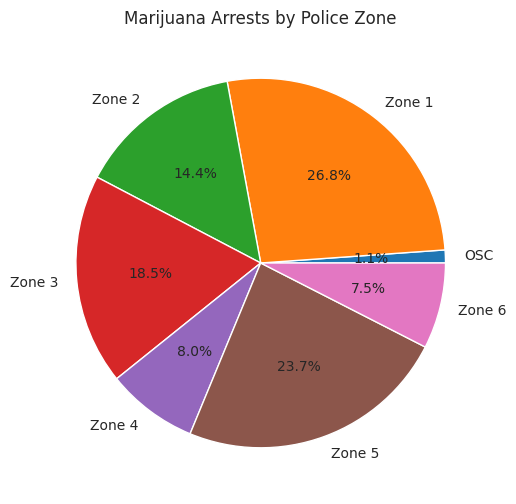

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_zone['mj_arrests_count'], labels=arrests_by_zone['INCIDENTZONE'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Police Zone')
plt.savefig('Marijuana_arrests_by_zone.png')
plt.show()

In [58]:
arrests_by_race_BHW = arrests_by_race.loc[arrests_by_race['RACE'].isin(['B','H','W'])].copy()

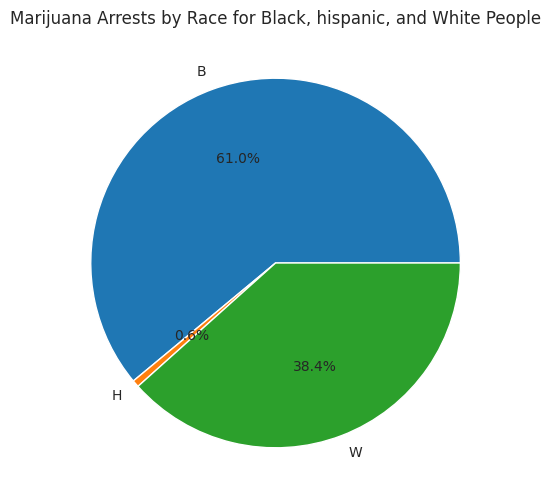

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_race_BHW['mj_arrests_count'], labels=arrests_by_race_BHW['RACE'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Race for Black, hispanic, and White People')
plt.savefig('Marijuana_arrests_by_race.png')
plt.show()

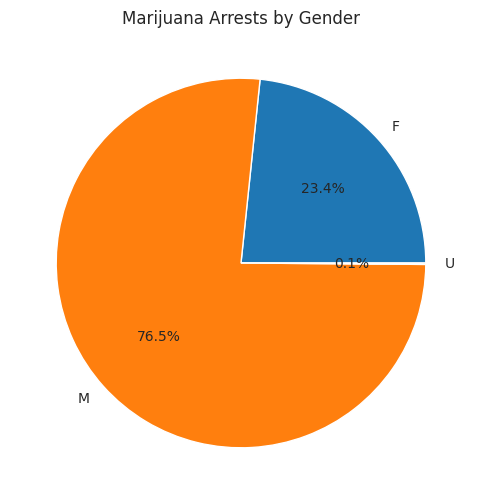

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_gender['mj_arrests_count'], labels=arrests_by_gender['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Gender')
plt.savefig('Marijuana_arrests_by_gender.png')
plt.show()

## Read WPRDC non-trafiic citation data from downloaded CSV file

In [61]:
cit_url = 'https://raw.githubusercontent.com/trailmarkerlib/policeProjectPythonWorkshop/main/data/6b11e87d-1216-463d-bbd3-37460e539d86.csv'

In [62]:
cit_df = pd.read_csv(cit_url)

In [63]:
cit_df = pd.read_csv(cit_url, low_memory = False)

### Explore citation data

#### Display information about the dataset

The info() method returns the number of rows as 'entries,' the number of columns, and the column names and datatypes.

In [64]:
cit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16070 entries, 0 to 16069
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16070 non-null  int64  
 1   PK                     16070 non-null  int64  
 2   CCR                    16070 non-null  object 
 3   GENDER                 16007 non-null  object 
 4   RACE                   15989 non-null  object 
 5   AGE                    15998 non-null  float64
 6   CITEDTIME              16070 non-null  object 
 7   INCIDENTLOCATION       16070 non-null  object 
 8   OFFENSES               16070 non-null  object 
 9   NEIGHBORHOOD           15310 non-null  object 
 10  ZONE                   16070 non-null  object 
 11  INCIDENTTRACT          15314 non-null  object 
 12  COUNCIL_DISTRICT       14240 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14240 non-null  float64
 14  X                      14279 non-null  float64
 15  Y 

#### Display the shape of the dataset: number of rows and columns

The shape property is a tuple with row and column counts: (rows, columns).

In [65]:
cit_df.shape

(16070, 16)

#### Display a set of rows from the top or bottom of the dataset

The head() method returns the first 5 rows of the dataset. If a number is entered inside the parenthesis, a corresponding number of rows from the top of the dataset is returned.

The tail() method works the same way but returns rows from the bottom of the dataset.




In [66]:
cit_df.head()

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403


In [67]:
cit_df.tail(10)

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
16060,26486,1105493,23155409,M,B,38.0,2023-09-30T02:27:00,"S 17TH ST & WRIGHTS WY PITTSBURGH, PA",601.16(b)(1)(a) Any Person who urinates or def...,NaN,3,NaN,3.0,3.0,-79.982000,40.429328
16061,26487,1105494,23155832,M,W,54.0,2023-09-30T21:02:00,"1800 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.980269,40.428487
16062,26488,1105495,23155880,M,W,35.0,2023-09-30T22:52:00,"200 Block S 9TH ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,NaN,NaN,NaN,NaN
16063,26489,1105496,23155904,F,W,26.0,2023-09-30T23:32:00,"1300 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.985178,40.428615
16064,26490,1105497,23155923,M,B,26.0,2023-10-01T01:30:00,"1500 Block E CARSON ST PITTSBURGH, PA",627.02(b)(i) Possessing a small amount of mari...,NaN,3,NaN,3.0,3.0,-79.983310,40.428693
16065,26491,1105498,23155936,F,W,51.0,2023-10-01T01:00:00,"1700 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16066,26492,1105499,23155939,M,B,18.0,2023-10-01T00:40:00,"1500 Block E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.983310,40.428693
16067,26493,1105500,23155939,M,B,18.0,2023-10-01T00:40:00,"1500 Block E CARSON ST PITTSBURGH, PA","6308(a) Underage Purchase, Consume, Possessed ...",NaN,3,NaN,3.0,3.0,-79.983310,40.428693
16068,26494,1105501,23155955,M,W,21.0,2023-10-01T00:40:00,"300 Block NORTH SHORE DR PITTSBURGH, PA",3503(b)(1)(ii) Defiant Trespass Notice Posted ...,California-Kirkbride,1,2507,NaN,NaN,NaN,NaN
16069,26495,1105502,23155955,M,W,21.0,2023-10-01T00:40:00,"300 Block NORTH SHORE DR PITTSBURGH, PA","6308(a) Underage Purchase, Consume, Possessed ...",California-Kirkbride,1,2507,NaN,NaN,NaN,NaN


#### Display the number of unique values for a specified column

The nunique() method returns the number of unique values in the specified column.

In [68]:
cit_df._id.nunique()

16070

In [69]:
cit_df._id.head()

0    1
1    2
2    3
3    4
4    5
Name: _id, dtype: int64

In [70]:
cit_df.PK.head()

0    1078081
1    1078082
2    1078083
3    1078084
4    1078085
Name: PK, dtype: int64

#### Display the mean of a specified column

#### mean()

The mean() method returns the average of specified column.

In [71]:
cit_df.AGE.mean()

32.97974746843355

#### Display unique values for a specific column

The unique() method returns the unique values of the specified column.

In [72]:
cit_df.RACE.unique()

array(['B', 'W', nan, 'O', 'A', 'H', 'I'], dtype=object)

#### Display row counts of unique values

The value_counts() method returns the count of each non-null value for the specified column.

In [73]:
cit_df.RACE.value_counts()

W    7685
B    7402
O     584
H     165
A     143
I      10
Name: RACE, dtype: int64

In [74]:
cit_df.GENDER.unique()

array(['M', nan, 'F'], dtype=object)

In [75]:
cit_df.GENDER.value_counts()

M    11553
F     4454
Name: GENDER, dtype: int64

#### Display the number of null values

The combination of isna() and sum() returns a count of rows that are null for the whole dataset or a specified column.

In [76]:
cit_df.isna().sum()

_id                         0
PK                          0
CCR                         0
GENDER                     63
RACE                       81
AGE                        72
CITEDTIME                   0
INCIDENTLOCATION            0
OFFENSES                    0
NEIGHBORHOOD              760
ZONE                        0
INCIDENTTRACT             756
COUNCIL_DISTRICT         1830
PUBLIC_WORKS_DIVISION    1830
X                        1791
Y                        1791
dtype: int64

In [77]:
cit_df.ZONE.isna().sum()

0

In [78]:
cit_df.ZONE.unique()

array(['4', '1', '5', '2', '3', '6', 'OSC', 'SDD'], dtype=object)

In [79]:
cit_df.ZONE.value_counts()

3      5579
2      3110
4      2466
1      2159
5      1599
6      1150
OSC       6
SDD       1
Name: ZONE, dtype: int64

#### Make a copy of the dataset

Copy the dataset with the copy() method. This is good practice if you are manipulating any variables.

In [80]:
cit_df_copy = cit_df.copy()

#### Modify values in a column

In [81]:
cit_df_copy['ZONE'] = ['Zone ' + str(x) if 'nan' not in str(x) and 'OSC' not in str(x) and 'SDD' not in str(x) else x for x in cit_df_copy['ZONE']]

In [82]:
cit_df_copy.ZONE.unique()

array(['Zone 4', 'Zone 1', 'Zone 5', 'Zone 2', 'Zone 3', 'Zone 6', 'OSC',
       'SDD'], dtype=object)

In [83]:
cit_df_copy.ZONE.value_counts()

Zone 3    5579
Zone 2    3110
Zone 4    2466
Zone 1    2159
Zone 5    1599
Zone 6    1150
OSC          6
SDD          1
Name: ZONE, dtype: int64

#### Summarize the data

The describe() method displays a summary of numeric columns. Sometimes this does not make sense. Notice below that `AGE` is the only numeric column where taking the average, standard deviation, quartiles, minimum, and maximum makes sense.

In [84]:
cit_df_copy.describe()

,_id,PK,AGE,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
count,16070.000000,1.607000e+04,15998.000000,14240.000000,14240.000000,14279.000000,14279.000000
mean,11798.516304,1.092125e+06,32.979747,4.372191,3.511025,-79.979633,40.437591
std,8506.455157,8.172484e+03,14.377990,2.321716,1.556084,0.035663,0.018964
min,1.000000,1.077841e+06,0.000000,1.000000,0.000000,-80.143708,40.364826
25%,4018.250000,1.084737e+06,22.000000,3.000000,3.000000,-80.001080,40.428607
50%,10379.500000,1.092644e+06,28.000000,3.000000,3.000000,-79.983474,40.438815
75%,19956.750000,1.099258e+06,41.000000,6.000000,5.000000,-79.960916,40.449841
max,26495.000000,1.105502e+06,121.000000,9.000000,6.000000,-79.809560,40.511631


In [85]:
summary_cit_df = cit_df_copy.groupby(['ZONE']).\
            aggregate(offenses_notna_count = ('OFFENSES', 'count'),
                      offenses_total_rows = ('OFFENSES', 'size'),
                      average_age = ('AGE', 'mean'),
                      minimum_age = ('AGE', min),
                      maximum_age = ('AGE', max)).\
            reset_index().copy()

In [86]:
summary_cit_df

,ZONE,offenses_notna_count,offenses_total_rows,average_age,minimum_age,maximum_age
0,OSC,6,6,23.500000,18.0,30.0
1,SDD,1,1,47.000000,47.0,47.0
2,Zone 1,2159,2159,35.522991,0.0,85.0
3,Zone 2,3110,3110,39.078171,0.0,121.0
4,Zone 3,5579,5579,29.710867,0.0,77.0
5,Zone 4,2466,2466,29.698497,0.0,117.0
6,Zone 5,1599,1599,31.708360,0.0,83.0
7,Zone 6,1150,1150,36.501310,0.0,80.0


#### Filter the data to include only marijuana arrests between August 2016 and September 2020

In [87]:
cit_df_copy['CITEDTIME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16070 entries, 0 to 16069
Series name: CITEDTIME
Non-Null Count  Dtype 
--------------  ----- 
16070 non-null  object
dtypes: object(1)
memory usage: 125.7+ KB


In [88]:
cit_df_copy['CITEDTIME'].head()

0    2016-08-22T23:45:00
1    2016-08-22T23:45:00
2    2016-08-25T11:10:00
3    2016-08-25T16:42:00
4    2016-08-28T00:58:00
Name: CITEDTIME, dtype: object

##### Filter by dates
Use the backslash character after the dot to drop method calls to a new line.

In [89]:
subset_cit_df = cit_df_copy[(cit_df_copy['CITEDTIME'] >= "2016-01-01") & (cit_df_copy['CITEDTIME'] < "2020-09-01")].\
          copy()

In [90]:
subset_cit_df.shape

(10685, 16)

##### Filter by offenses

In [91]:
subset_cit_df['marijuana_flag'] = [1 if 'marijuana' in str(x).lower() else 0 for x in subset_cit_df['OFFENSES']]

In [92]:
subset_cit_df['paraphernalia_flag'] = [1 if 'paraphernalia' in str(x).lower() else 0 for x in subset_cit_df['OFFENSES']]

In [93]:
subset_cit_df.loc[subset_cit_df['marijuana_flag'] == 1].head()

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,marijuana_flag,paraphernalia_flag
911,912,1079341,16232977,M,B,20.0,2016-12-15T01:00:00,"HOWARD ST PITTSBURGH, PA",627.02(b)(i) Possessing a small amount of mari...,Fineview,Zone 1,2509,NaN,NaN,NaN,NaN,1,0
945,946,1079418,16236043,M,B,19.0,2016-12-19T22:10:00,"600 Block LIBERTY AV PITTSBURGH, PA",627.02(b)(i) Possessing a small amount of mari...,Central Business District,Zone 2,201,6.0,6.0,-80.001620,40.441773,1,0
947,948,1079420,16236107,M,B,48.0,2016-12-20T01:30:00,"N BRADDOCK AV & BENNETT ST PITTSBURGH, PA",627.02(b)(i) Possessing a small amount of mari...,Homewood South,Zone 5,1304,9.0,2.0,-79.890381,40.455032,1,0
965,966,1079438,16239376,F,W,20.0,2016-12-26T00:51:00,"N CRAIG ST & CENTRE AV PITTSBURGH, PA",627.02(b)(ii) Smoking a small amount of mariju...,North Oakland,Zone 4,507,8.0,3.0,-79.952018,40.451884,1,0
966,967,1079439,16239376,M,W,21.0,2016-12-26T00:51:00,"N CRAIG ST & CENTRE AV PITTSBURGH, PA",627.02(b)(ii) Smoking a small amount of mariju...,North Oakland,Zone 4,507,8.0,3.0,-79.952018,40.451884,1,0


In [94]:
subset_cit_df.loc[subset_cit_df['marijuana_flag'] == 1].shape

(726, 18)

In [95]:
subset_cit_df.loc[subset_cit_df['paraphernalia_flag'] == 1].head()

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,marijuana_flag,paraphernalia_flag


In [96]:
subset_cit_df['mari_para_flag'] = [1 if ('marijuana' in str(x).lower()) else 0 for x in subset_cit_df['OFFENSES']]

In [97]:
mj_cit_df = subset_cit_df.loc[subset_cit_df['mari_para_flag'] == 1].copy()

In [98]:
mj_cit_df.shape

(726, 19)

In [99]:
mj_cit_df['OFFENSES'].unique()

array(['627.02(b)(i) Possessing a small amount of marijuana',
       '627.02(b)(ii) Smoking a small amount of marijuana in any public space',
       '13(a)(31)(iii) Marijuana - Distribute Small Amt/Not for Sale'],
      dtype=object)

In [100]:
mj_cit_df['OFFENSES'].isna().sum()

0

#### Summarize by police zone, race, and gender

In [101]:
citations_by_zone = mj_cit_df.groupby(['ZONE']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [102]:
citations_by_zone

,ZONE,mj_citations_count
0,OSC,1
1,Zone 1,62
2,Zone 2,75
3,Zone 3,163
4,Zone 4,109
5,Zone 5,267
6,Zone 6,49


In [103]:
citations_by_race = mj_cit_df.groupby(['RACE']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [104]:
citations_by_race

,RACE,mj_citations_count
0,A,1
1,B,541
2,H,8
3,I,1
4,O,10
5,W,164


In [105]:
citations_by_gender = mj_cit_df.groupby(['GENDER']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [106]:
citations_by_gender

,GENDER,mj_citations_count
0,F,130
1,M,595


#### Visualize the data

Seaborn color palettes:
https://seaborn.pydata.org/tutorial/color_palettes.html

In [107]:
# define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')

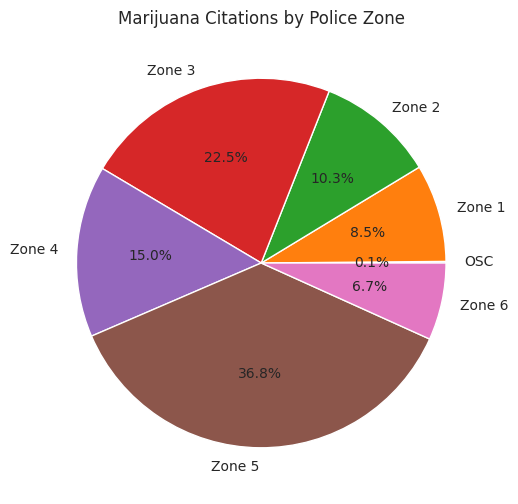

In [108]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_zone['mj_citations_count'], labels=citations_by_zone['ZONE'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Police Zone')
plt.savefig('Marijuana_citations_by_zone.png')
plt.show()

In [109]:
citations_by_race_BHW = citations_by_race.loc[citations_by_race['RACE'].isin(['B','H','W'])].copy()

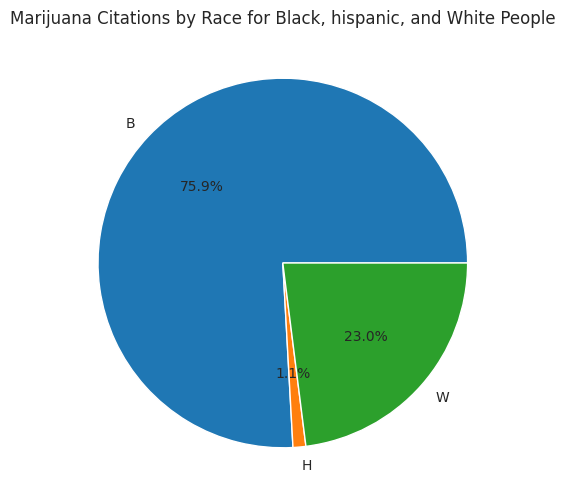

In [110]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_race_BHW['mj_citations_count'], labels=citations_by_race_BHW['RACE'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Race for Black, hispanic, and White People')
plt.savefig('Marijuana_citations_by_race.png')
plt.show()

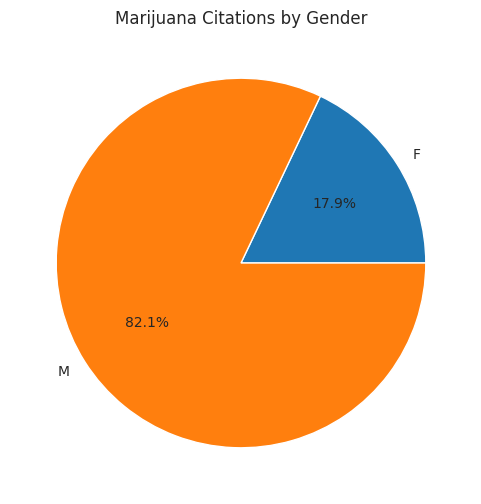

In [111]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_gender['mj_citations_count'], labels=citations_by_gender['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Gender')
plt.savefig('Marijuana_citations_by_gender.png')
plt.show()

## Visualizations by Gender for Black, Hispanic, and White People

#### Select only arrest records where RACE is 'B', 'H', or 'W'

In [112]:
mj_arr_df2 = mj_arr_df.loc[mj_arr_df['RACE'].isin(['B', 'H', 'W'])].copy()

In [113]:
mj_arr_df2['RACE'].value_counts()

B    5858
W    3683
H      59
Name: RACE, dtype: int64

In [114]:
arrests_by_gender_by_race = mj_arr_df2.groupby(['GENDER', 'RACE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [115]:
arrests_by_gender_by_race

,GENDER,RACE,mj_arrests_count
0,F,B,993
1,F,H,6
2,F,W,1239
3,M,B,4858
4,M,H,53
5,M,W,2442
6,U,B,7
7,U,W,2


#### Select only citation records where RACE is 'B', 'H', or 'W'

In [116]:
mj_cit_df2 = mj_cit_df.loc[mj_cit_df['RACE'].isin(['B', 'H', 'W'])].copy()

In [117]:
mj_cit_df2['RACE'].value_counts()

B    541
W    164
H      8
Name: RACE, dtype: int64

In [118]:
citations_by_gender_by_race = mj_cit_df2.groupby(['GENDER', 'RACE']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [119]:
citations_by_gender_by_race

,GENDER,RACE,mj_citations_count
0,F,B,81
1,F,H,3
2,F,W,43
3,M,B,460
4,M,H,5
5,M,W,121


#### Marijuana Arrests by Gender for Black People

In [120]:
arrests_by_gender_black = arrests_by_gender_by_race.loc[arrests_by_gender_by_race['RACE'] == 'B'].copy()

In [121]:
arrests_by_gender_black

,GENDER,RACE,mj_arrests_count
0,F,B,993
3,M,B,4858
6,U,B,7


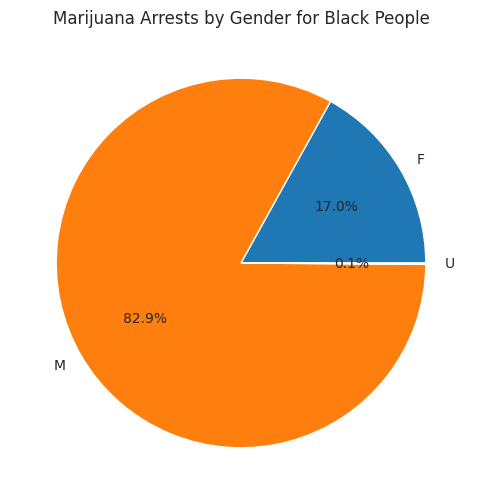

In [122]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_gender_black['mj_arrests_count'], labels=arrests_by_gender_black['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Gender for Black People')
plt.savefig('Marijuana_arrests_by_gender_black.png')
plt.show()

#### Marijuana Citations by Gender for Black People

In [123]:
citations_by_gender_black = citations_by_gender_by_race.loc[citations_by_gender_by_race['RACE'] == 'B'].copy()

In [124]:
citations_by_gender_black

,GENDER,RACE,mj_citations_count
0,F,B,81
3,M,B,460


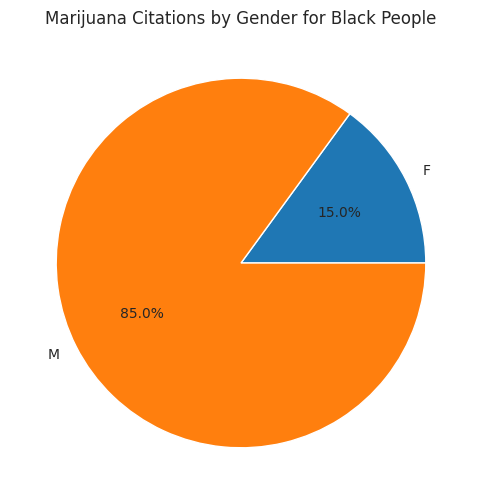

In [125]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_gender_black['mj_citations_count'], labels=citations_by_gender_black['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Gender for Black People')
plt.savefig('Marijuana_citations_by_gender_black.png')
plt.show()

#### Marijuana Arrests by Gender for White People

In [126]:
arrests_by_gender_white = arrests_by_gender_by_race.loc[arrests_by_gender_by_race['RACE'] == 'W'].copy()

In [127]:
arrests_by_gender_white

,GENDER,RACE,mj_arrests_count
2,F,W,1239
5,M,W,2442
7,U,W,2


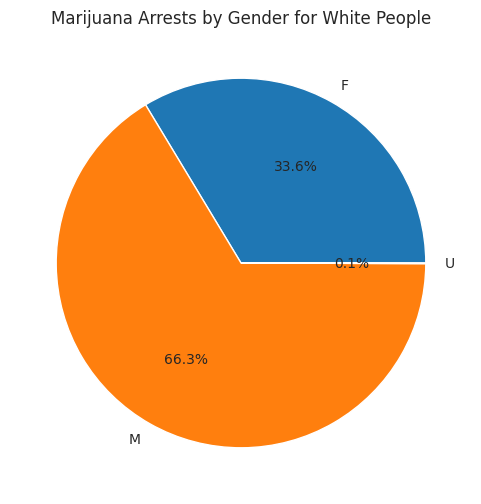

In [128]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_gender_white['mj_arrests_count'], labels=arrests_by_gender_white['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Gender for White People')
plt.savefig('Marijuana_arrests_by_gender_white.png')
plt.show()

#### Marijuana Citations by Gender for White People

In [129]:
citations_by_gender_white = citations_by_gender_by_race.loc[citations_by_gender_by_race['RACE'] == 'W'].copy()

In [130]:
citations_by_gender_white

,GENDER,RACE,mj_citations_count
2,F,W,43
5,M,W,121


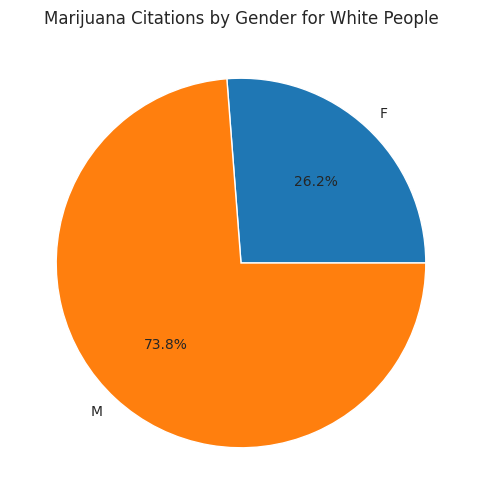

In [131]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_gender_white['mj_citations_count'], labels=citations_by_gender_white['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Gender for White People')
plt.savefig('Marijuana_citations_by_gender_white.png')
plt.show()

#### Marijuana Arrests by Gender for Hispanic People

In [132]:
arrests_by_gender_hisp = arrests_by_gender_by_race.loc[arrests_by_gender_by_race['RACE'] == 'H'].copy()

In [133]:
arrests_by_gender_hisp

,GENDER,RACE,mj_arrests_count
1,F,H,6
4,M,H,53


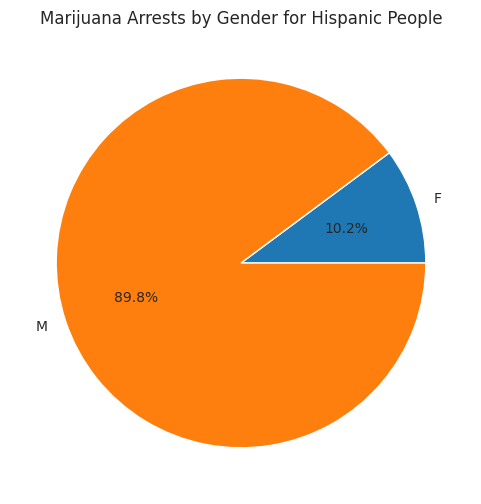

In [134]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_gender_hisp['mj_arrests_count'], labels=arrests_by_gender_hisp['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Gender for Hispanic People')
plt.savefig('Marijuana_arrests_by_gender_hispanic.png')
plt.show()

#### Marijuana Citations by Gender for Hispanic People

In [135]:
citations_by_gender_hisp = citations_by_gender_by_race.loc[citations_by_gender_by_race['RACE'] == 'H'].copy()

In [136]:
citations_by_gender_hisp

,GENDER,RACE,mj_citations_count
1,F,H,3
4,M,H,5


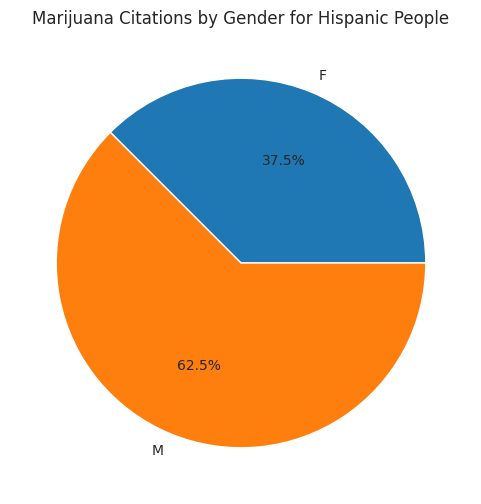

In [137]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_gender_hisp['mj_citations_count'], labels=citations_by_gender_hisp['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Gender for Hispanic People')
plt.savefig('Marijuana_citations_by_gender_hispanic.png')
plt.show()

## Visualizations by Zone for Black, Hispanic, and White People

#### Use arrest dataset where RACE is 'B', 'H', or 'W'

In [138]:
arrests_by_zone_by_race = mj_arr_df2.groupby(['INCIDENTZONE', 'RACE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [139]:
arrests_by_zone_by_race

,INCIDENTZONE,RACE,mj_arrests_count
0,OSC,B,80
1,OSC,W,29
2,Zone 1,B,1491
3,Zone 1,H,14
4,Zone 1,W,1075
5,Zone 2,B,925
6,Zone 2,H,12
7,Zone 2,W,447
8,Zone 3,B,806
9,Zone 3,H,13


#### Use citation dataset where RACE is 'B', 'H', or 'W'

In [140]:
citations_by_zone_by_race = mj_cit_df2.groupby(['ZONE', 'RACE']).\
            aggregate(mj_citations_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [141]:
citations_by_zone_by_race

,ZONE,RACE,mj_citations_count
0,OSC,B,1
1,Zone 1,B,47
2,Zone 1,W,14
3,Zone 2,B,55
4,Zone 2,H,1
5,Zone 2,W,16
6,Zone 3,B,105
7,Zone 3,H,2
8,Zone 3,W,54
9,Zone 4,B,61


#### Marijuana Arrests by Race for Zone 1

In [142]:
arrests_by_race_zone1 = arrests_by_zone_by_race.loc[arrests_by_zone_by_race['INCIDENTZONE'] == 'Zone 1'].copy()

In [143]:
arrests_by_race_zone1

,INCIDENTZONE,RACE,mj_arrests_count
2,Zone 1,B,1491
3,Zone 1,H,14
4,Zone 1,W,1075


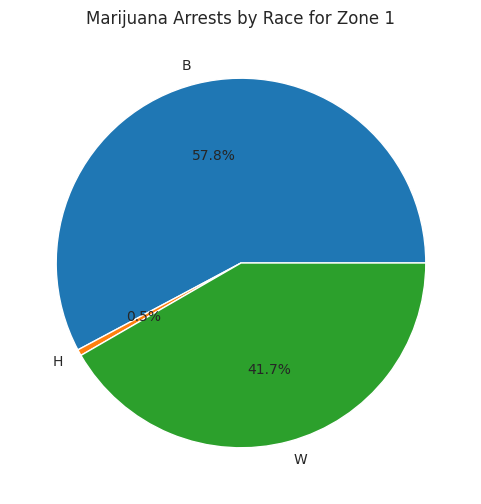

In [144]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_race_zone1['mj_arrests_count'], labels=arrests_by_race_zone1['RACE'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Race for Zone 1')
plt.savefig('Marijuana_arrests_by_race_zone1.png')
plt.show()

#### Marijuana Citations by Race for Zone 1

In [145]:
citations_by_race_zone1 = citations_by_zone_by_race.loc[citations_by_zone_by_race['ZONE'] == 'Zone 1'].copy()

In [146]:
citations_by_race_zone1

,ZONE,RACE,mj_citations_count
1,Zone 1,B,47
2,Zone 1,W,14


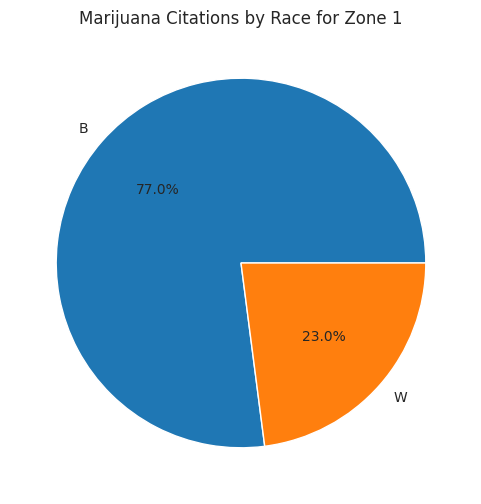

In [147]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(citations_by_race_zone1['mj_citations_count'], labels=citations_by_race_zone1['RACE'], autopct='%1.1f%%')
plt.title('Marijuana Citations by Race for Zone 1')
plt.savefig('Marijuana_citations_by_race_zone1.png')
plt.show()

## Stack Datasets and Create Stacked Bar Charts

#### Add variable to distinguish arrest records from citation records

In [148]:
mj_arr_df['record_type'] = 'Arrest'

In [149]:
mj_cit_df['record_type'] = 'Non-traffic Citation'

#### Select desired columns
Some columns between the two datasets are not in the same order and do not have the same names. List the variables in the same order and rename those that differ.

In [150]:
mj_arr_df.columns

Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y', 'marijuana_flag',
       'paraphernalia_flag', 'mari_para_flag', 'record_type'],
      dtype='object')

In [151]:
mj_arr_df2 = mj_arr_df.loc[:,['PK', 'AGE', 'GENDER', 'RACE','INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT', 'record_type']].\
            rename(columns={'INCIDENTNEIGHBORHOOD':'NEIGHBORHOOD','INCIDENTZONE':'ZONE','INCIDENTTRACT':'TRACT'}).\
            copy()

In [152]:
mj_cit_df.columns

Index(['_id', 'PK', 'CCR', 'GENDER', 'RACE', 'AGE', 'CITEDTIME',
       'INCIDENTLOCATION', 'OFFENSES', 'NEIGHBORHOOD', 'ZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y', 'marijuana_flag',
       'paraphernalia_flag', 'mari_para_flag', 'record_type'],
      dtype='object')

In [153]:
mj_cit_df2 = mj_cit_df.loc[:,['PK', 'AGE', 'GENDER', 'RACE','NEIGHBORHOOD', 'ZONE', 'INCIDENTTRACT', 'record_type']].\
            rename(columns={'INCIDENTTRACT':'TRACT'}).\
            copy()

In [154]:
mj_arr_df2.head()

,PK,AGE,GENDER,RACE,NEIGHBORHOOD,ZONE,TRACT,record_type
14,1975078,53.0,M,B,East Allegheny,Zone 1,2304.0,Arrest
16,1975138,22.0,F,W,East Allegheny,Zone 1,2304.0,Arrest
22,1975395,26.0,F,B,Golden Triangle/Civic Arena,Zone 2,201.0,Arrest
33,1974767,32.0,M,W,Middle Hill,Zone 2,501.0,Arrest
57,1974709,21.0,F,B,East Hills,Zone 5,1306.0,Arrest


In [155]:
mj_cit_df2.head()

,PK,AGE,GENDER,RACE,NEIGHBORHOOD,ZONE,TRACT,record_type
911,1079341,20.0,M,B,Fineview,Zone 1,2509,Non-traffic Citation
945,1079418,19.0,M,B,Central Business District,Zone 2,201,Non-traffic Citation
947,1079420,48.0,M,B,Homewood South,Zone 5,1304,Non-traffic Citation
965,1079438,20.0,F,W,North Oakland,Zone 4,507,Non-traffic Citation
966,1079439,21.0,M,W,North Oakland,Zone 4,507,Non-traffic Citation


#### Stack the arrests and citations datasets
Setting the axis paramter equal to 0 tells Python to stack the datasets one on top of the other, to stack them vertically by rows.

In [156]:
mj_stack_df = pd.concat([mj_arr_df2, mj_cit_df2], axis=0).reset_index().copy()

In [157]:
mj_stack_df.head()

,index,PK,AGE,GENDER,RACE,NEIGHBORHOOD,ZONE,TRACT,record_type
0,14,1975078,53.0,M,B,East Allegheny,Zone 1,2304.0,Arrest
1,16,1975138,22.0,F,W,East Allegheny,Zone 1,2304.0,Arrest
2,22,1975395,26.0,F,B,Golden Triangle/Civic Arena,Zone 2,201.0,Arrest
3,33,1974767,32.0,M,W,Middle Hill,Zone 2,501.0,Arrest
4,57,1974709,21.0,F,B,East Hills,Zone 5,1306.0,Arrest


In [158]:
mj_stack_df.tail()

,index,PK,AGE,GENDER,RACE,NEIGHBORHOOD,ZONE,TRACT,record_type
10455,10821,1097313,40.0,M,B,Hazelwood,Zone 4,1515,Non-traffic Citation
10456,10824,1097316,19.0,M,W,Beechview,Zone 6,1916,Non-traffic Citation
10457,11279,1098143,32.0,M,W,Sheraden,Zone 6,2018,Non-traffic Citation
10458,11282,1098146,25.0,F,B,Central Business District,Zone 2,201,Non-traffic Citation
10459,11965,1099132,30.0,M,B,Homewood South,Zone 5,1304,Non-traffic Citation


#### Stacked Bar Chart of Arrests and Citations by Race for Zone 1

https://www.pythoncharts.com/python/stacked-bar-charts/

In [159]:
zone_1_df = mj_stack_df.loc[(mj_stack_df['ZONE']=='Zone 1') & (mj_stack_df['RACE'].isin(['B','H','W']))].\
                groupby(['RACE', 'record_type'])['PK'].\
                count().\
                unstack().\
                fillna(0)

In [160]:
zone_1_df

record_type,Arrest,Non-traffic Citation
RACE,,
B,1491.0,47.0
H,14.0,0.0
W,1075.0,14.0


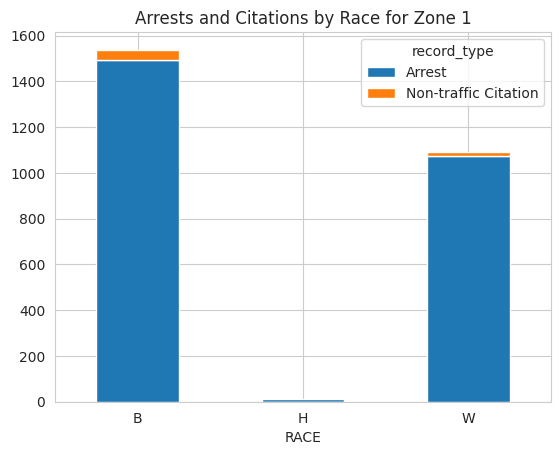

In [161]:
# Very simple one-liner using our agg_tips DataFrame.
zone_1_df.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Arrests and Citations by Race for Zone 1')
plt.xticks(rotation=0, ha='center')
plt.savefig('Marijuana_arrests_and_citations_by_race_zone1.png')
plt.show()

NOTE: Counts need to be considered against the distribution of race in the population.

#### Stacked Bar Chart of Arrests and Citations by Race for Zone 2

https://www.pythoncharts.com/python/stacked-bar-charts/

In [162]:
zone_2_df = mj_stack_df.loc[(mj_stack_df['ZONE']=='Zone 2') & (mj_stack_df['RACE'].isin(['B','H','W']))].\
                groupby(['RACE', 'record_type'])['PK'].\
                count().\
                unstack().\
                fillna(0)

In [163]:
zone_2_df

record_type,Arrest,Non-traffic Citation
RACE,,
B,925,55
H,12,1
W,447,16


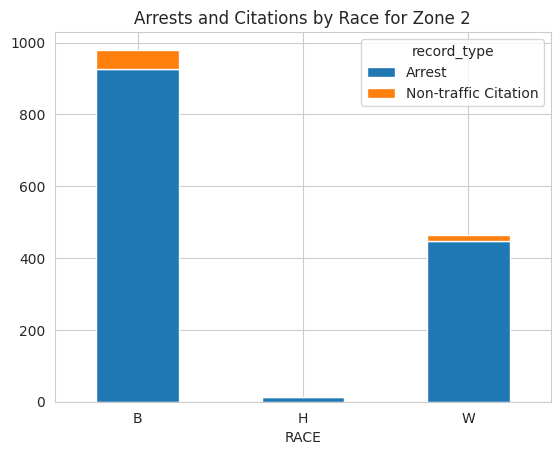

In [164]:
# Very simple one-liner using our agg_tips DataFrame.
zone_2_df.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Arrests and Citations by Race for Zone 2')
plt.xticks(rotation=0, ha='center')
plt.savefig('Marijuana_arrests_and_citations_by_race_zone2.png')
plt.show()

NOTE: Counts need to be considered against the distribution of race in the population.

#### Stacked Bar Chart of Arrests and Citations by Race for Zone 3

In [165]:
zone_3_df = mj_stack_df.loc[(mj_stack_df['ZONE']=='Zone 3') & (mj_stack_df['RACE'].isin(['B','H','W']))].\
                groupby(['RACE', 'record_type'])['PK'].\
                count().\
                unstack().\
                fillna(0)

In [166]:
zone_3_df

record_type,Arrest,Non-traffic Citation
RACE,,
B,806,105
H,13,2
W,935,54


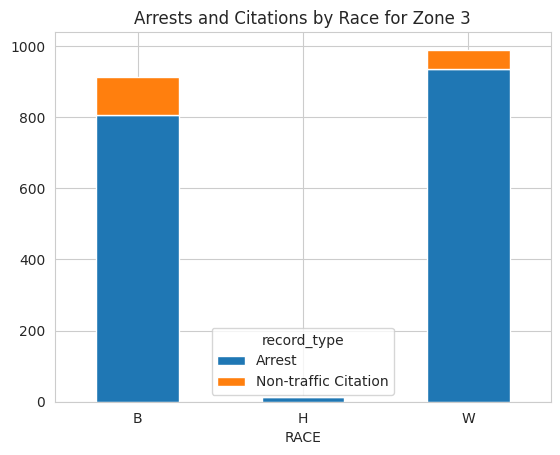

In [167]:
# Very simple one-liner using our agg_tips DataFrame.
zone_3_df.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Arrests and Citations by Race for Zone 3')
plt.xticks(rotation=0, ha='center')
plt.savefig('Marijuana_arrests_and_citations_by_race_zone3.png')
plt.show()

NOTE: Counts need to be considered against the distribution of race in the population.

#### Stacked Bar Chart of Arrests and Citations by Race for Zone 5

In [168]:
zone_5_df = mj_stack_df.loc[(mj_stack_df['ZONE']=='Zone 5') & (mj_stack_df['RACE'].isin(['B','H','W']))].\
                groupby(['RACE', 'record_type'])['PK'].\
                count().\
                unstack().\
                fillna(0)

In [169]:
zone_5_df

record_type,Arrest,Non-traffic Citation
RACE,,
B,1766,242
H,10,4
W,505,20


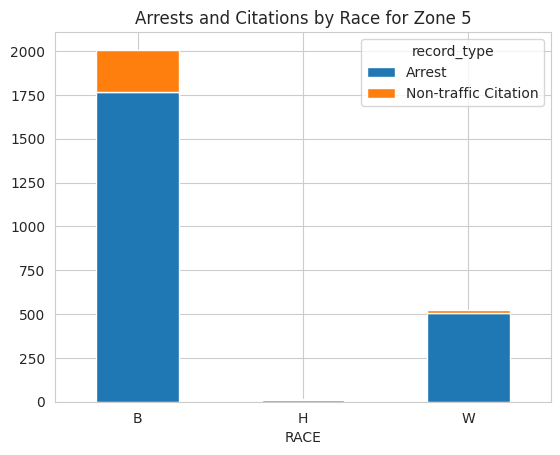

In [170]:
# Very simple one-liner using our agg_tips DataFrame.
zone_5_df.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Arrests and Citations by Race for Zone 5')
plt.xticks(rotation=0, ha='center')
plt.savefig('Marijuana_arrests_and_citations_by_race_zone5.png')
plt.show()

NOTE: Counts need to be considered against the distribution of race in the population.

#### Stacked Bar Chart of Arrest and Citation Proportions for Zone 5

In [171]:
zone_5_df

record_type,Arrest,Non-traffic Citation
RACE,,
B,1766,242
H,10,4
W,505,20


In [172]:
zone_5_df['Total'] = zone_5_df['Arrest'] + zone_5_df['Non-traffic Citation']

In [173]:
zone_5_df

record_type,Arrest,Non-traffic Citation,Total
RACE,,,
B,1766,242,2008
H,10,4,14
W,505,20,525


In [174]:
zone_5_df['Prop_arrests'] = zone_5_df['Arrest']/zone_5_df['Total']

In [175]:
zone_5_df['Prop_citations'] = zone_5_df['Non-traffic Citation']/zone_5_df['Total']

In [176]:
zone_5_df

record_type,Arrest,Non-traffic Citation,Total,Prop_arrests,Prop_citations
RACE,,,,,
B,1766,242,2008,0.879482,0.120518
H,10,4,14,0.714286,0.285714
W,505,20,525,0.961905,0.038095


In [177]:
zone_5_df2 = zone_5_df.loc[:,['Prop_arrests','Prop_citations']].copy()

In [178]:
zone_5_df2

record_type,Prop_arrests,Prop_citations
RACE,,
B,0.879482,0.120518
H,0.714286,0.285714
W,0.961905,0.038095


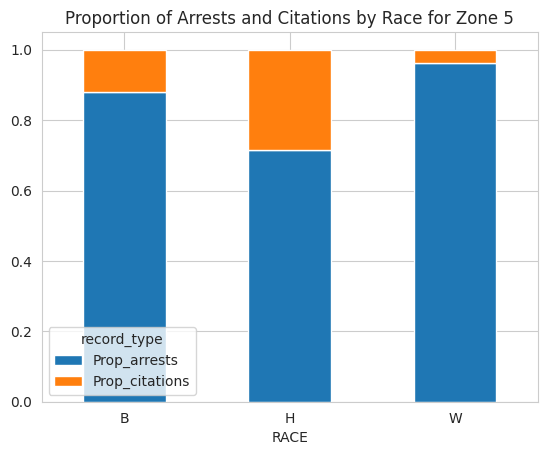

In [179]:
# Very simple one-liner using our agg_tips DataFrame.
zone_5_df2.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Proportion of Arrests and Citations by Race for Zone 5')
plt.xticks(rotation=0, ha='center')
plt.savefig('Marijuana_arrests_and_citations_by_race_zone5_prop.png')
plt.show()

#### Stacked Bar Chart for Zone 5 Seaborn Method

In [180]:
mj_stack_df.head()

,index,PK,AGE,GENDER,RACE,NEIGHBORHOOD,ZONE,TRACT,record_type
0,14,1975078,53.0,M,B,East Allegheny,Zone 1,2304.0,Arrest
1,16,1975138,22.0,F,W,East Allegheny,Zone 1,2304.0,Arrest
2,22,1975395,26.0,F,B,Golden Triangle/Civic Arena,Zone 2,201.0,Arrest
3,33,1974767,32.0,M,W,Middle Hill,Zone 2,501.0,Arrest
4,57,1974709,21.0,F,B,East Hills,Zone 5,1306.0,Arrest


In [181]:
mj_stack_df['weight'] = 1

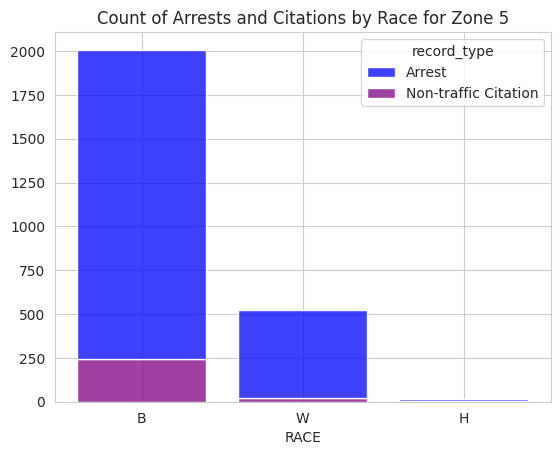

In [182]:
ax = sns.histplot(
    mj_stack_df.loc[(mj_stack_df['ZONE']=='Zone 5') & (mj_stack_df['RACE'].isin(['B','H','W']))],
    x='RACE',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='weight',
    hue='record_type',
    multiple='stack',
    palette=['blue', 'purple'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Count of Arrests and Citations by Race for Zone 5')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

plt.show()

NOTE: Counts need to be considered against the distribution of race in the population.